In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from PIL import Image

In [2]:
df = pd.read_csv('s:/projects/Bank_Customer_Churn_Prediction/data/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Analysis

In [6]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

#### Plot a Pie Chart

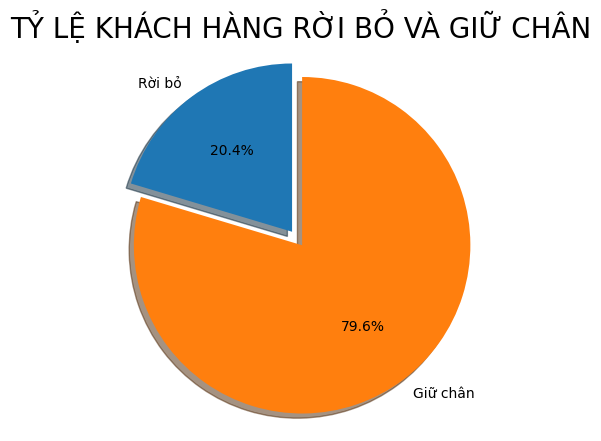

In [7]:
labels = 'Rời bỏ', 'Giữ chân'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG RỜI BỎ VÀ GIỮ CHÂN", size = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

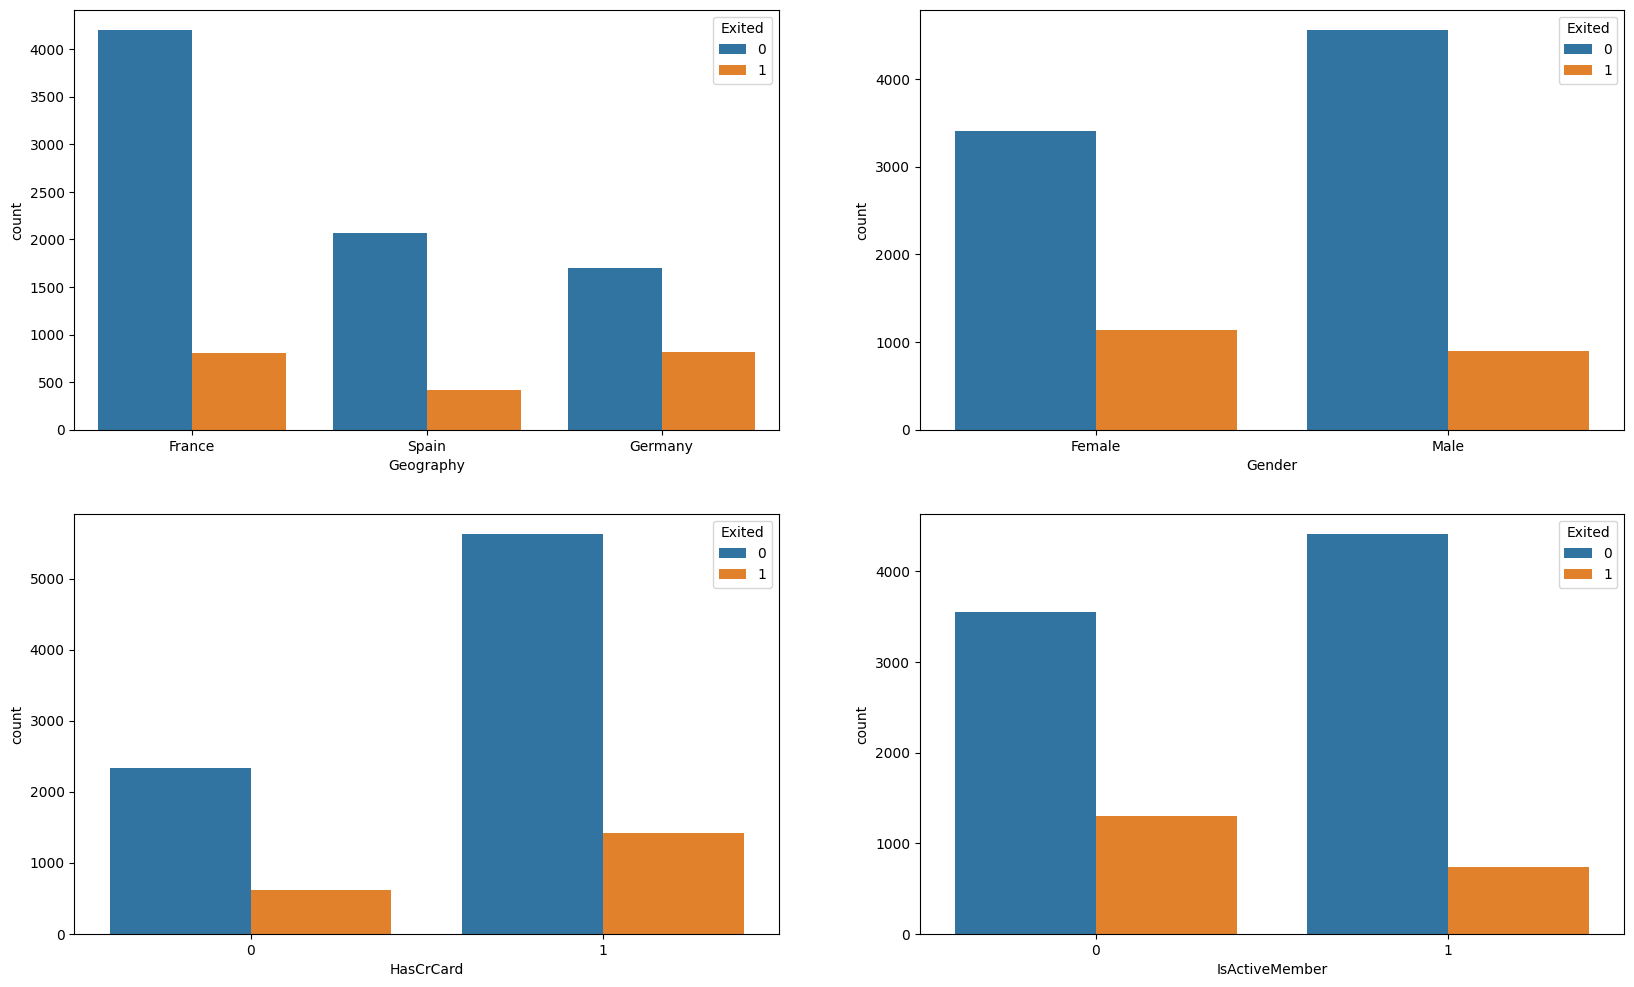

In [8]:
# Trực quan hóa các biến hạng mục
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

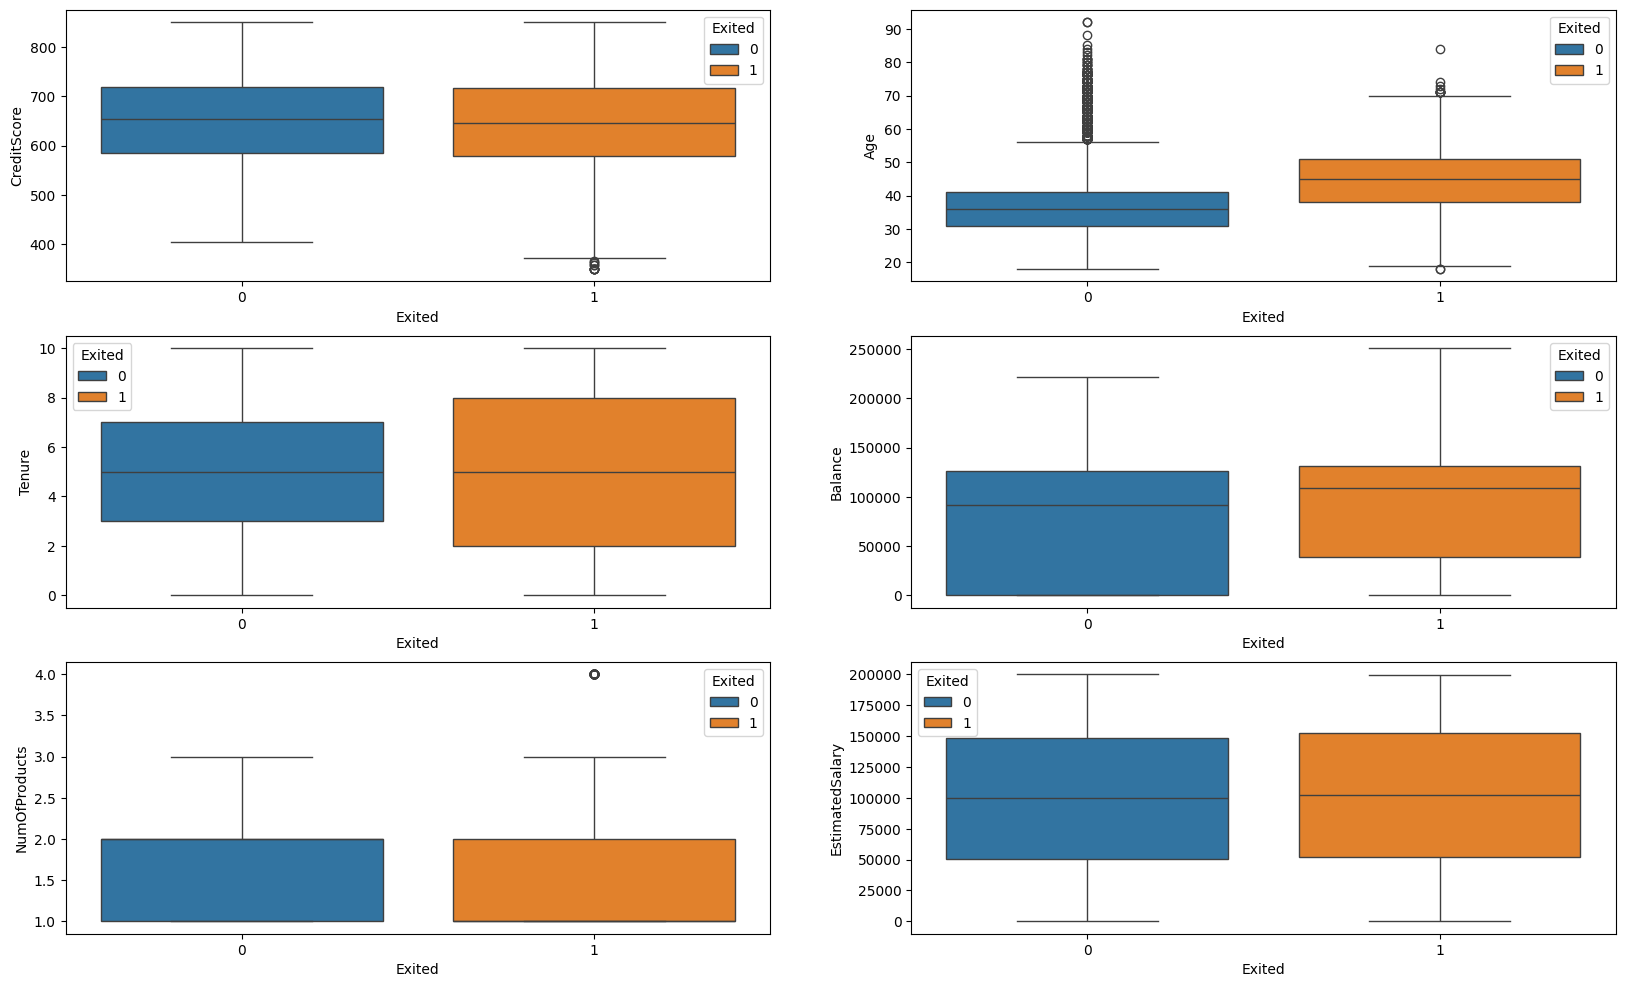

In [9]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### Features Engineering

#### Making a new column Balance Salary Ratio

###### Công thức Balance / EstimatedSalary được sử dụng trong ngành tín dụng để đo lường mức độ nợ của một cá nhân so với thu nhập ước tính của họ. Công thức này được tính bằng cách chia số dư còn lại trên tài khoản hoặc tín dụng của khách hàng cho thu nhập ước tính của họ. Điều này giúp các tổ chức tín dụng đánh giá khả năng thanh toán của một khách hàng dựa trên mức độ nợ của họ so với thu nhập.

###### Balance = Số dư còn lại trên tài khoản hoặc tín dụng của khách hàng
###### EstimatedSalary = Thu nhập ước tính của họ

(-1.0, 5.0)

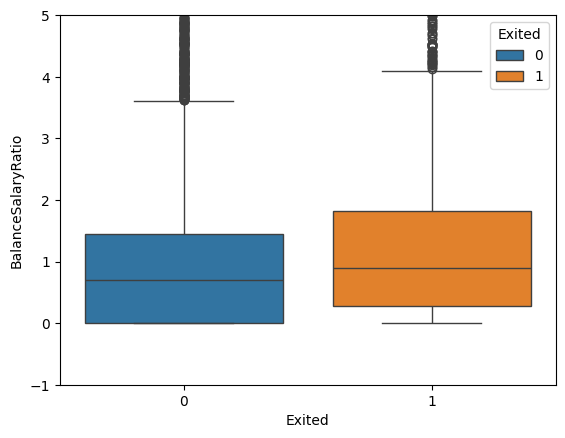

In [10]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

###### Công thức Tenure / Age được sử dụng trong ngành tài chính để đánh giá mối quan hệ giữa thời gian một khách hàng đã sử dụng dịch vụ của một tổ chức và độ tuổi của họ. Công thức này thường được sử dụng để đánh giá độ trung thành của khách hàng và độ ổn định của họ.

###### Tenure = Thời gian một khách hàng đã sử dụng dịch vụ của một tổ chức
###### Age = Độ tuổi của họ

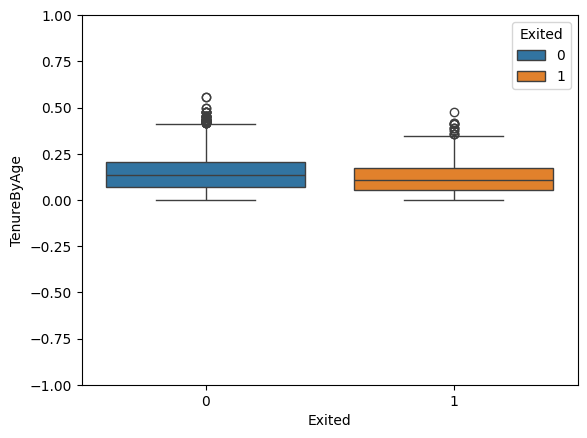

In [11]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

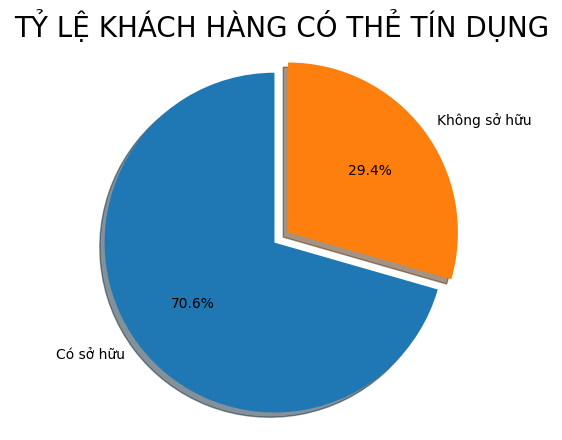

In [12]:
#Total Customers by HasCrCard, Pie chart
labels = 'Có sở hữu', 'Không sở hữu'
sizes = [df.HasCrCard[df['HasCrCard']==1].count(), df.HasCrCard[df['HasCrCard']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG CÓ THẺ TÍN DỤNG", size = 20)
plt.show()

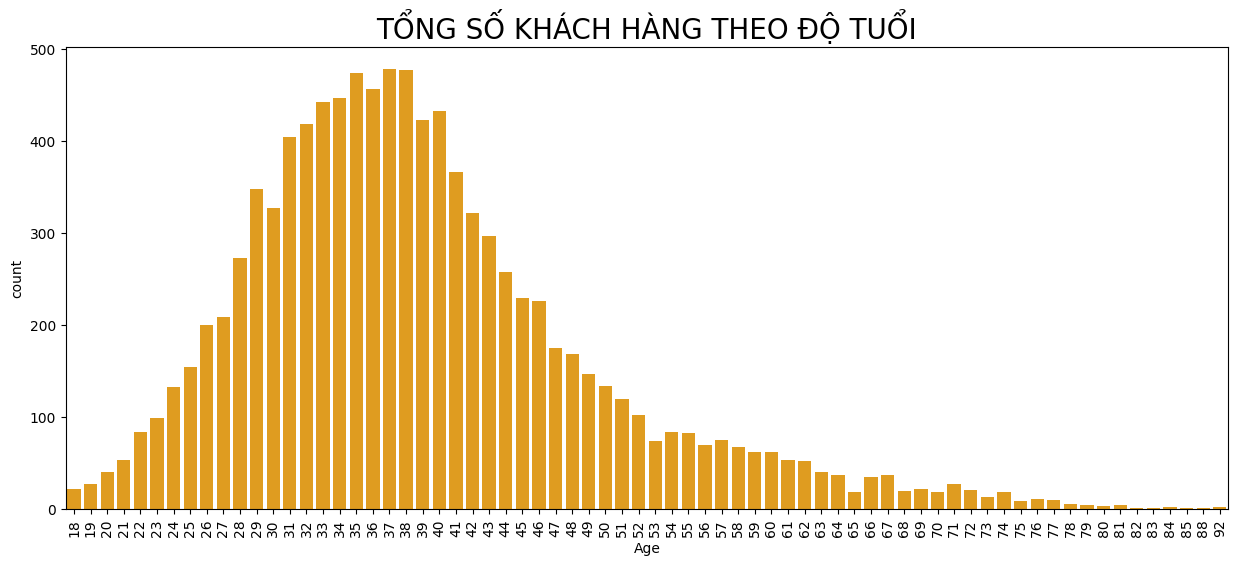

In [13]:
#Total customers by Age
plt.figure(figsize=(15,6))
sns.countplot(x='Age', data = df,color= 'orange')
plt.title('TỔNG SỐ KHÁCH HÀNG THEO ĐỘ TUỔI', size = 20)
plt.xticks(rotation = 90)
plt.show()

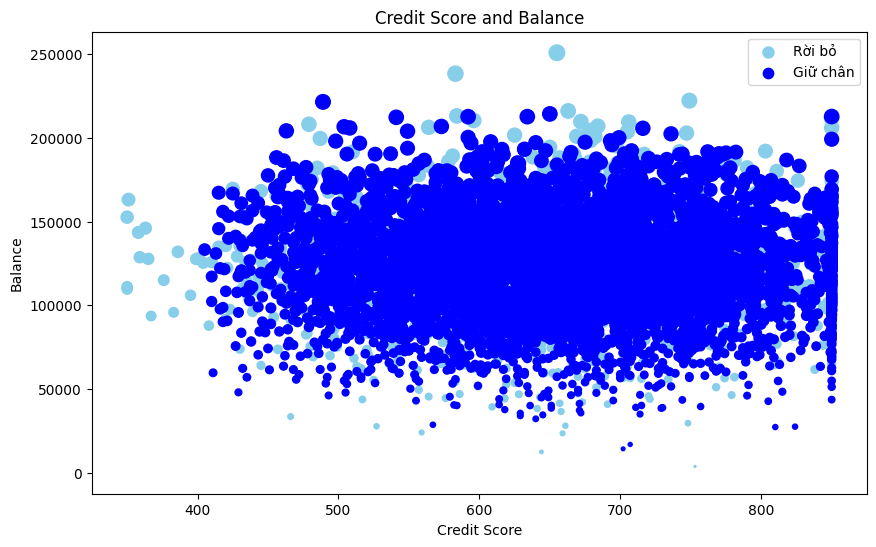

In [14]:
# Exited, CreditScore and Balance
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.CreditScore[df.Exited == 1], df.Balance[df.Exited == 1], s=df.Balance[df.Exited == 1]*0.0005, c='skyblue', marker="o", label='Rời bỏ')
ax.scatter(df.CreditScore[df.Exited == 0], df.Balance[df.Exited == 0], s=df.Balance[df.Exited == 0]*0.0005, c='blue', marker="o", label='Giữ chân')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Balance')
ax.set_title('Credit Score and Balance')
ax.legend()
plt.show()

#### Printing the categorical variables unique values

In [15]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [16]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


#### Label Ecoding

In [17]:
df['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)

C:\Users\Du Phat Minh\AppData\Local\Temp\ipykernel_32308\3642771212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)
C:\Users\Du Phat Minh\AppData\Local\Temp\ipykernel_32308\3642771212.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

#### One Hot Encoding Method

In [18]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,False,False,True


#### Standardized data


In [19]:
scale_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [20]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,False,False,True


### Train Test Split

In [21]:
X = df1.drop('Exited', axis='columns') ##indepenent features
y = df1['Exited'] ##dependent features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [22]:
len(X_train.columns)

14

In [23]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')   
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### Model Building and Prediction
#### The Sequential model
##### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

#### A Sequential model is not appropriate when:
##### -Model has multiple inputs or multiple outputs
##### -Any of layers has multiple inputs or multiple outputs
##### -Non-linear topology (e.g. a residual connection, a multi-branch model)

In [24]:
# Check the shape of the input data
print(X_train.shape)

model = keras.Sequential([
    # Update the input_shape parameter to match the shape of your input data
    keras.layers.Dense(12, input_shape=(None,32, 14), activation='relu'),
    keras.layers.Dense(3, input_shape=(None,15), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


(8000, 14)




Epoch 1/100


250/250 [==============================] - 1s 918us/step - loss: 0.5849 - accuracy: 0.7859
Epoch 2/100
250/250 [==============================] - 0s 872us/step - loss: 0.4843 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 908us/step - loss: 0.4716 - accuracy: 0.7958
Epoch 4/100
250/250 [==============================] - 0s 896us/step - loss: 0.4566 - accuracy: 0.8026
Epoch 5/100
250/250 [==============================] - 0s 929us/step - loss: 0.4429 - accuracy: 0.8105
Epoch 6/100
250/250 [==============================] - 0s 896us/step - loss: 0.4347 - accuracy: 0.8136
Epoch 7/100
250/250 [==============================] - 0s 904us/step - loss: 0.4318 - accuracy: 0.8174
Epoch 8/100
250/250 [==============================] - 0s 904us/step - loss: 0.4303 - accuracy: 0.8158
Epoch 9/100
250/250 [==============================] - 0s 892us/step - loss: 0.4293 - accuracy: 0.8144
Epoch 10/100
250/250 [==============================] - 0s 892us/step 

In [25]:
model.evaluate(X_test.astype('float32'), y_test)

63/63 [==============================] - 0s 880us/step - loss: 0.3699 - accuracy: 0.8465


[0.3699307143688202, 0.8464999794960022]

In [26]:
yp = model.predict(X_test.astype('float32'))


63/63 [==============================] - 0s 741us/step


### Converting our predictions to 0,1 to check accuracy

In [27]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [28]:
y_pred  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


### Checking the accuracy 

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1595
         1.0       0.68      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.83      0.85      0.83      2000



In [30]:
out_path = 's:/projects/Bank_Customer_Churn_Prediction/model'

tf.keras.saving.save_model(model, out_path)

INFO:tensorflow:Assets written to: s:/projects/Bank_Customer_Churn_Prediction/model\assets


INFO:tensorflow:Assets written to: s:/projects/Bank_Customer_Churn_Prediction/model\assets
